# Indian liver patient records

Będziemy starali się określić, czy pacjent o danych syndromach rzeczywiście ma chorobę wątroby.
Źródło danych: https://www.kaggle.com/uciml/indian-liver-patient-records

In [2]:
# import sys  
# !{sys.executable} -m pip install seaborn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import os

In [4]:
data = pd.read_csv("data/liver.csv")
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Dane:
- `Age` - wiek pacjenta
- `Gender` - płeć pacjenta
- `Total_Bilirubin` - zawartość bilirubiny we krwi
- `Direct_Bilirubin` - sprzężona bilirubina we krwi
- `Alkaline_Phosphotase` - fosfataza alkaliczna we krwi
- `Alamine_Aminotransferase` - aminotransferaza alaninowa we krwi
- `Aspartate_Aminotransferase` - 
- `Total_Protiens` - 
- `Albumin` - 
- `Albumin_and_Globulin_Ratio` - 
- `Dataset` - obecność choroby wątroby u pacjenta

### Przygotujmy dane do badania

In [5]:
# Sprawdźmy, czy brakuje nam jakichś danych

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [7]:
# w kolumnie Albumin_and_Globulin_Ratio brakuje czterech wartości, możemy zignorować te wiersze
data = data.dropna()

In [8]:
# możemy teraz wydzielić z danych kolumnę ze statusem choroby
y = data['Dataset'] - 1
data.drop(columns='Dataset', inplace=True)

In [9]:
# wszystkie wartości poza płcią są liczbowe, zamienimy je na 0 lub 1
encoder = LabelEncoder()
data['Sex'] = encoder.fit_transform(data['Gender'])
data = data.drop(columns='Gender')

In [10]:
# dane są już kompletne
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 582
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         579 non-null    int64  
 1   Total_Bilirubin             579 non-null    float64
 2   Direct_Bilirubin            579 non-null    float64
 3   Alkaline_Phosphotase        579 non-null    int64  
 4   Alamine_Aminotransferase    579 non-null    int64  
 5   Aspartate_Aminotransferase  579 non-null    int64  
 6   Total_Protiens              579 non-null    float64
 7   Albumin                     579 non-null    float64
 8   Albumin_and_Globulin_Ratio  579 non-null    float64
 9   Sex                         579 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 49.8 KB


### Analiza danych

Text(0.5, 0.98, 'Feature distributions')

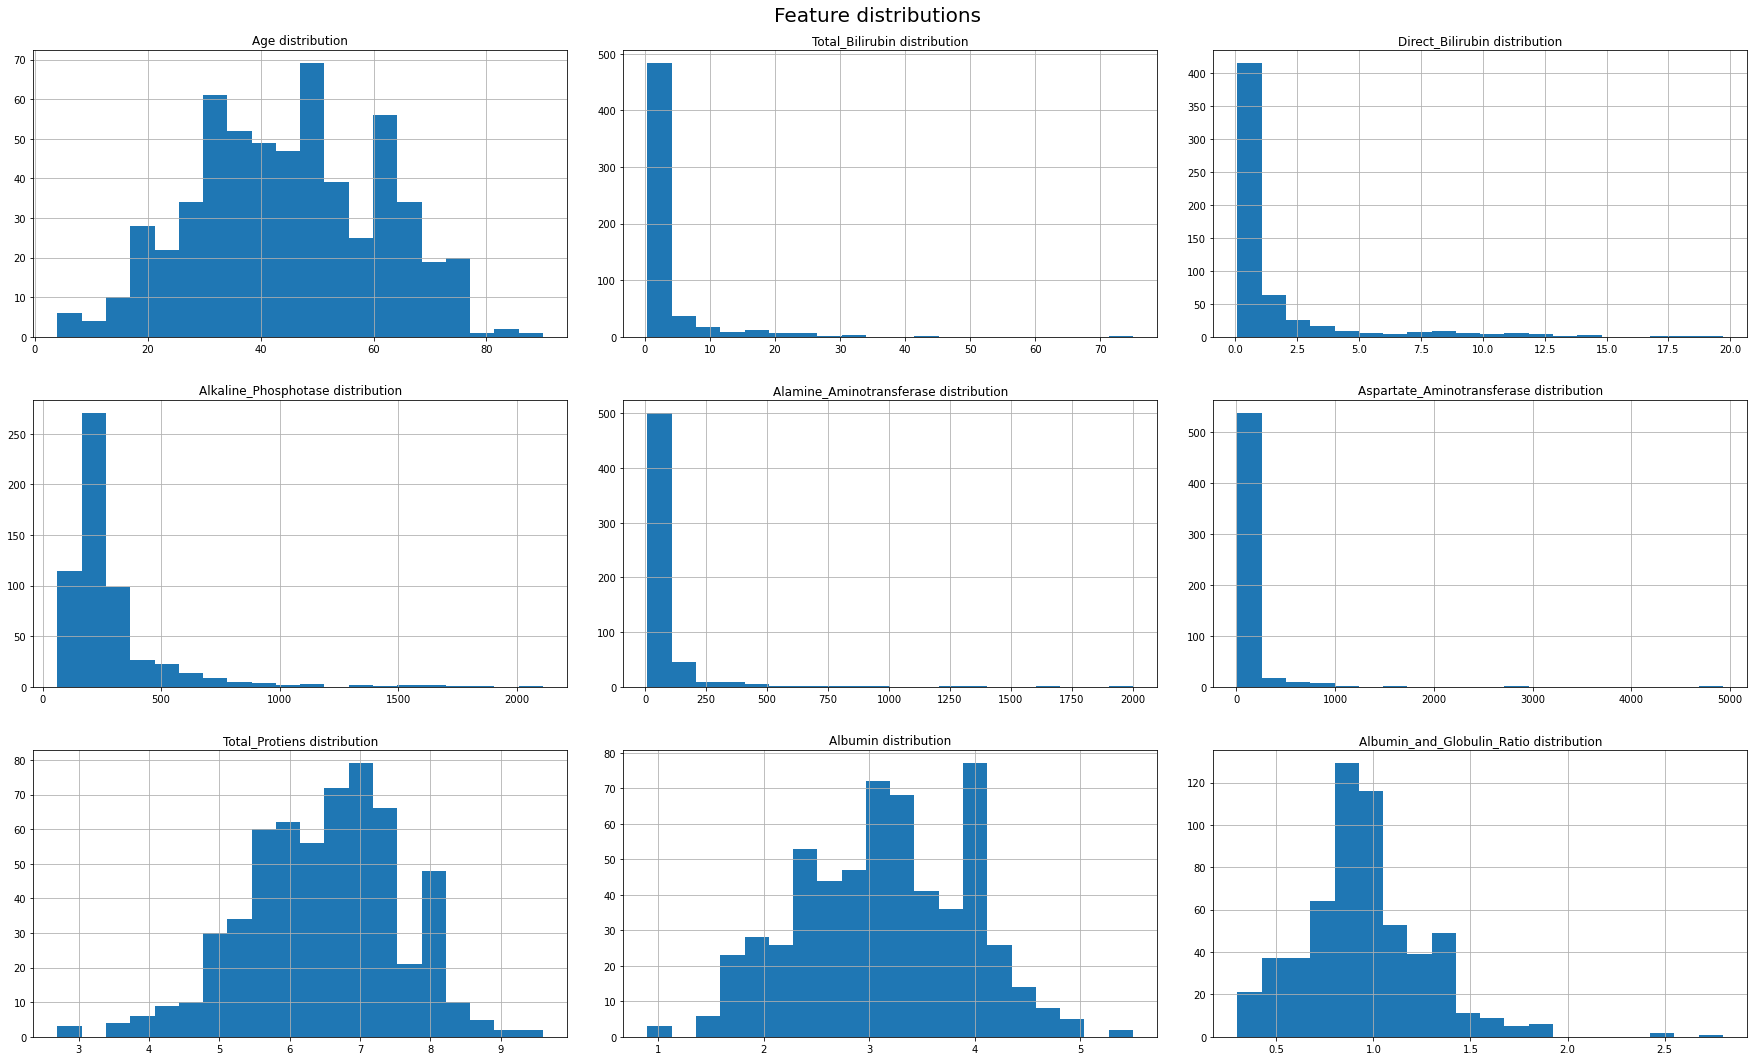

In [11]:
# sprawdzmy dystrybucje danych

fig, ax = plt.subplots(3, 3, figsize=(25,15))

i=0
j=0

for column in list(data.columns[:-1]):
    data[column].hist(bins=20, ax=ax[i,j])
    ax[i,j].set_title(column + " distribution")
    j=j+1
    if j == 3:
        i=i+1
        j=0
        
fig.tight_layout(pad=3.0)
fig.suptitle("Feature distributions", fontsize=20,verticalalignment='bottom')

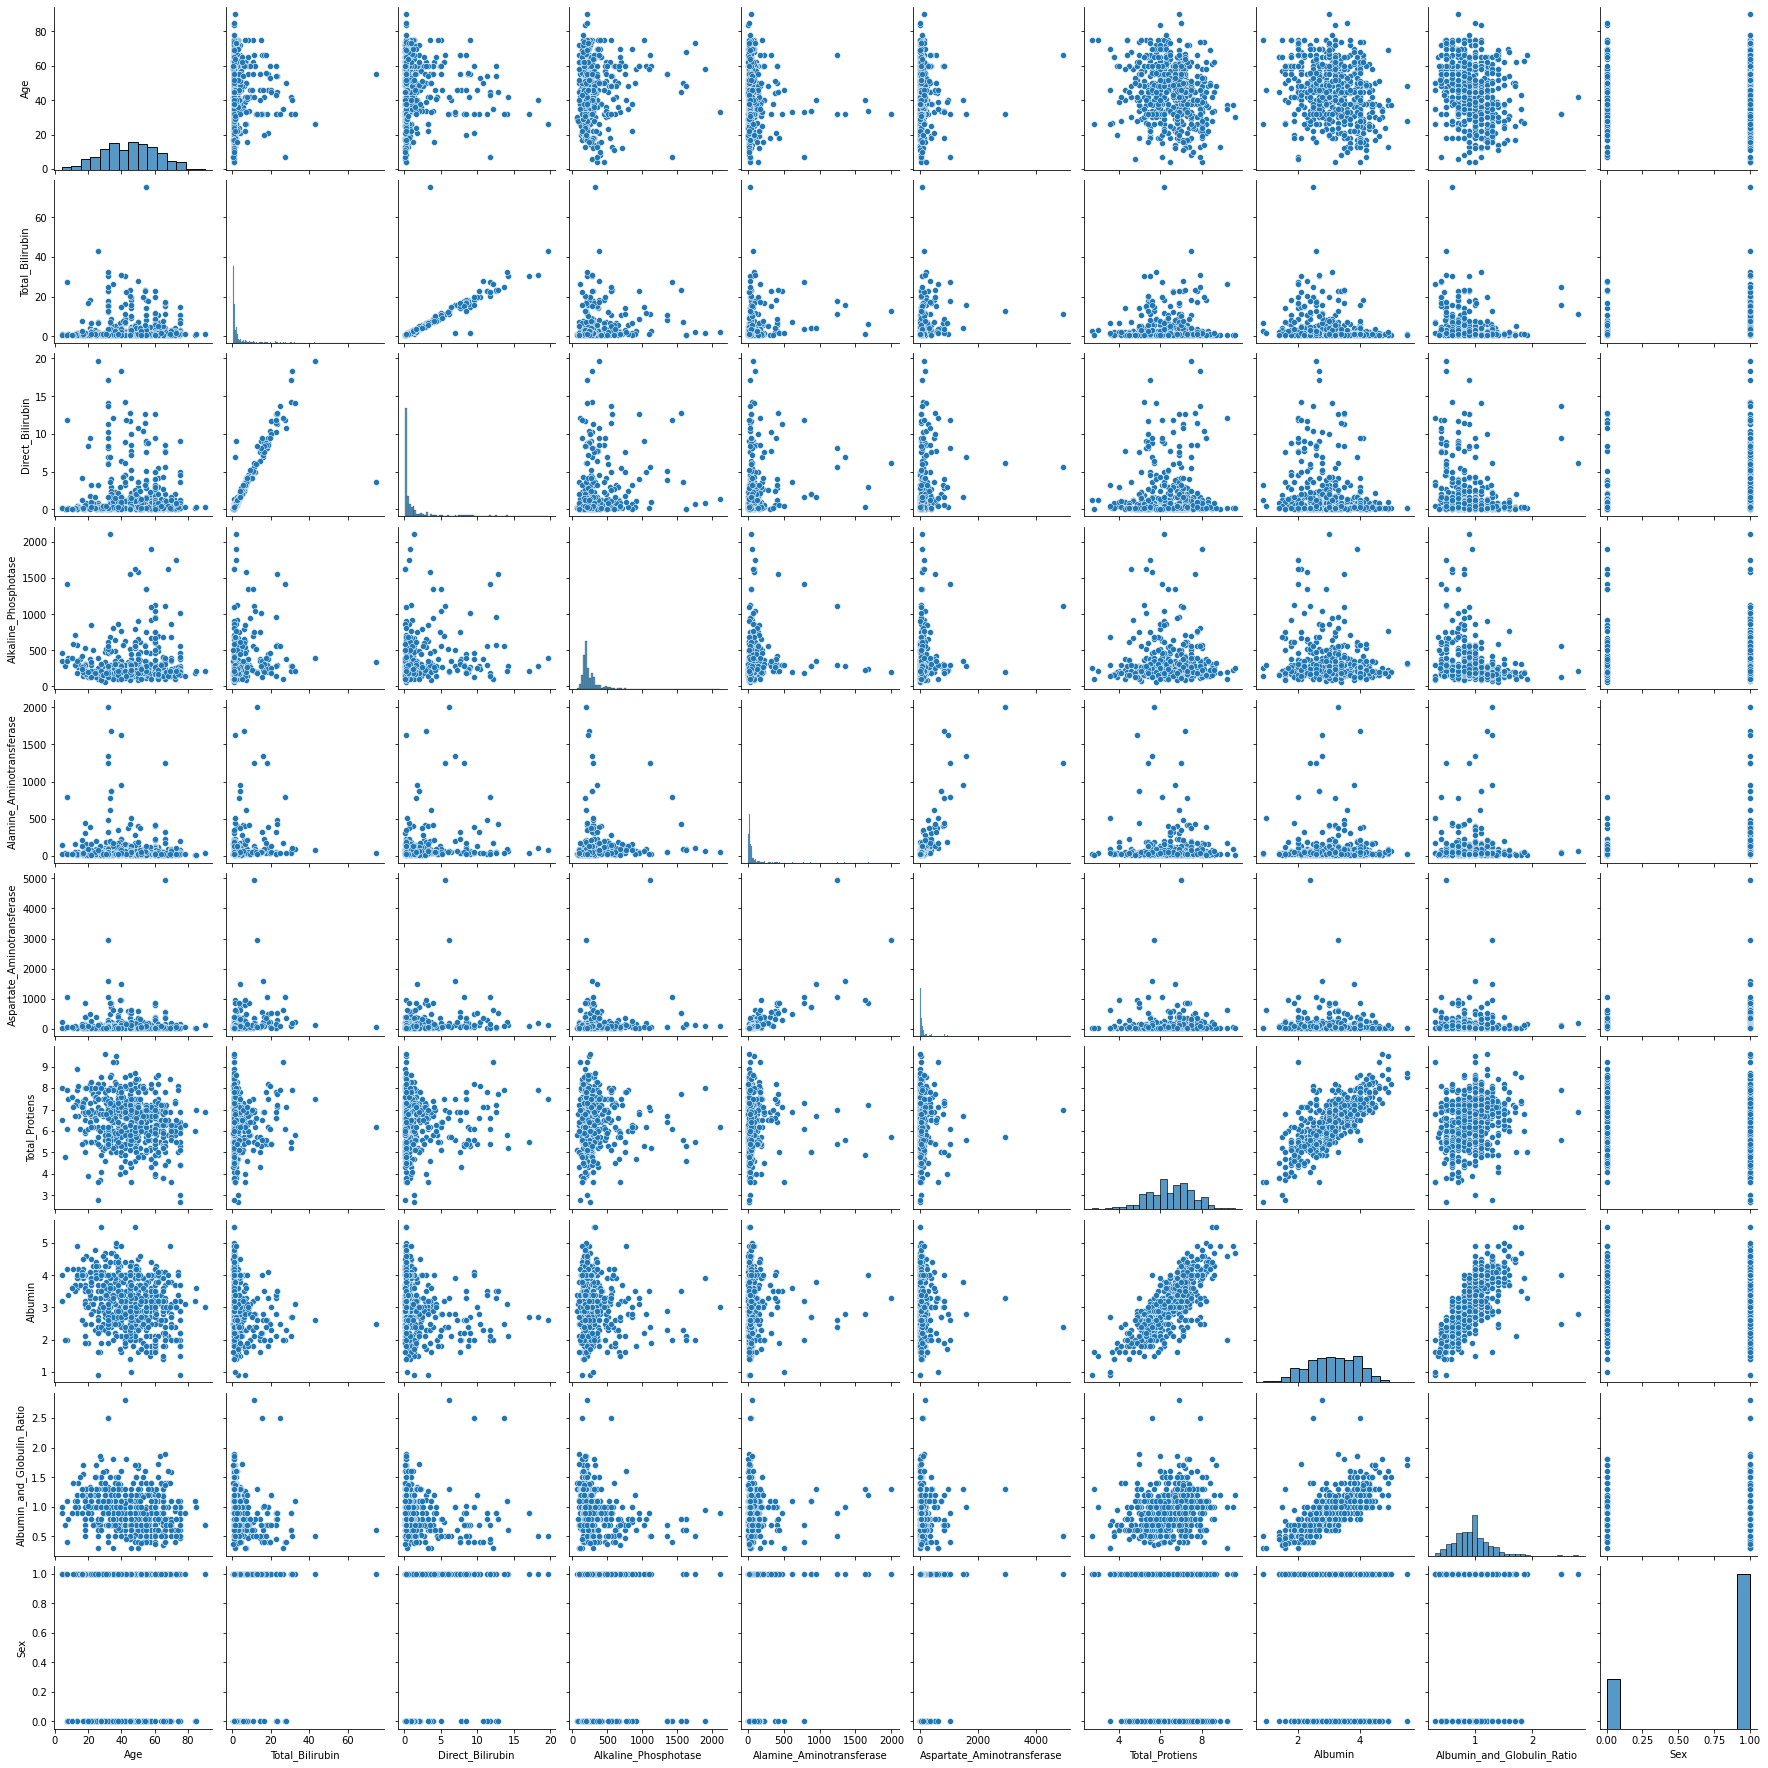

In [12]:
# sprawdźmy, czy istnieją oczywiste korelacje pomiędzy danymi

sns.pairplot(data)
plt.show()

In [13]:
corr = data.loc[:, data.columns != "Dataset"].corr()
corr

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Sex
Age,1.000000,0.011000,0.006784,0.078878,-0.087799,-0.020499,-0.186248,-0.264211,-0.216408,0.055881
Total_Bilirubin,0.011000,1.000000,0.874481,0.205739,0.213375,0.237323,-0.007906,-0.222087,-0.206267,0.088068
Direct_Bilirubin,0.006784,0.874481,1.000000,0.234008,0.233180,0.257022,0.000033,-0.228409,-0.200125,0.099160
Alkaline_Phosphotase,0.078878,0.205739,0.234008,1.000000,0.124777,0.166580,-0.027062,-0.163419,-0.234166,-0.029368
Alamine_Aminotransferase,-0.087799,0.213375,0.233180,0.124777,1.000000,0.791862,-0.042432,-0.028658,-0.002375,0.081339
Aspartate_Aminotransferase,-0.020499,0.237323,0.257022,0.166580,0.791862,1.000000,-0.025751,-0.084915,-0.070040,0.079421
Total_Protiens,-0.186248,-0.007906,0.000033,-0.027062,-0.042432,-0.025751,1.000000,0.783112,0.234887,-0.095149
Albumin,-0.264211,-0.222087,-0.228409,-0.163419,-0.028658,-0.084915,0.783112,1.000000,0.689632,-0.095579
Albumin_and_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.003424
Sex,0.055881,0.088068,0.099160,-0.029368,0.081339,0.079421,-0.095149,-0.095579,-0.003424,1.000000


Text(0.5, 1.05, 'Pearson Correlation of Features')

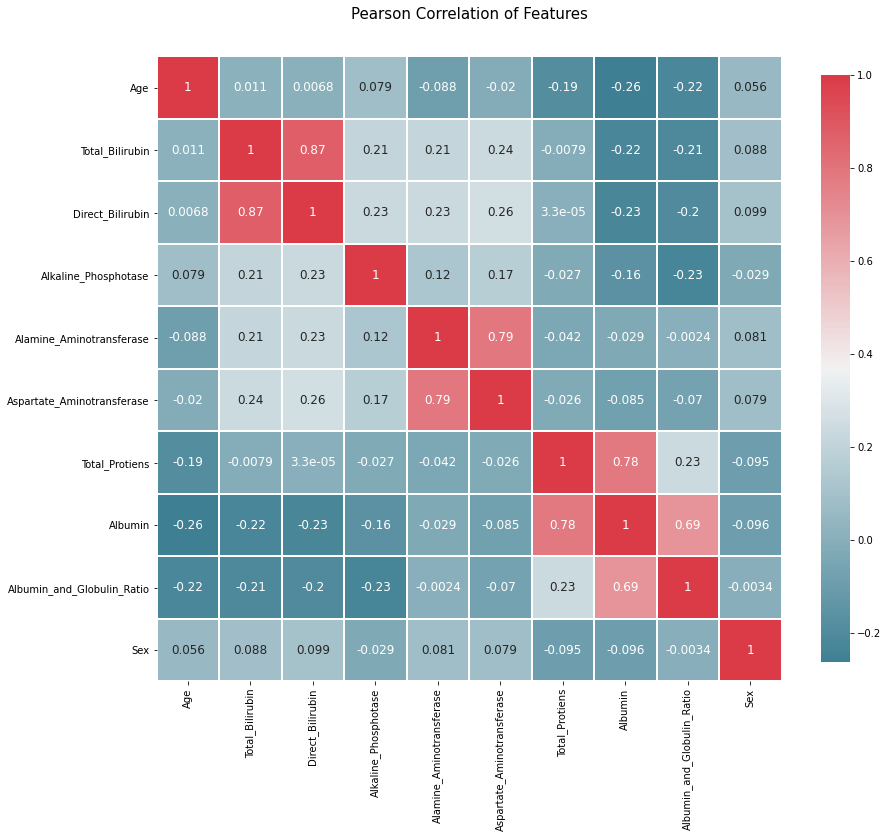

In [14]:
# stworzmy heatmapę

_, ax = plt.subplots(figsize = (14, 12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(data.corr(), cmap=cmap, square=True, cbar_kws={'shrink':.9},ax=ax, annot=True, linewidths=0.1, vmax=1.0, linecolor='white', annot_kws={'fontsize':12})

plt.title('Pearson Correlation of Features', y=1.05, size=15)

Text(0, 0.5, 'Almnine Aminotransferase (units/L)')

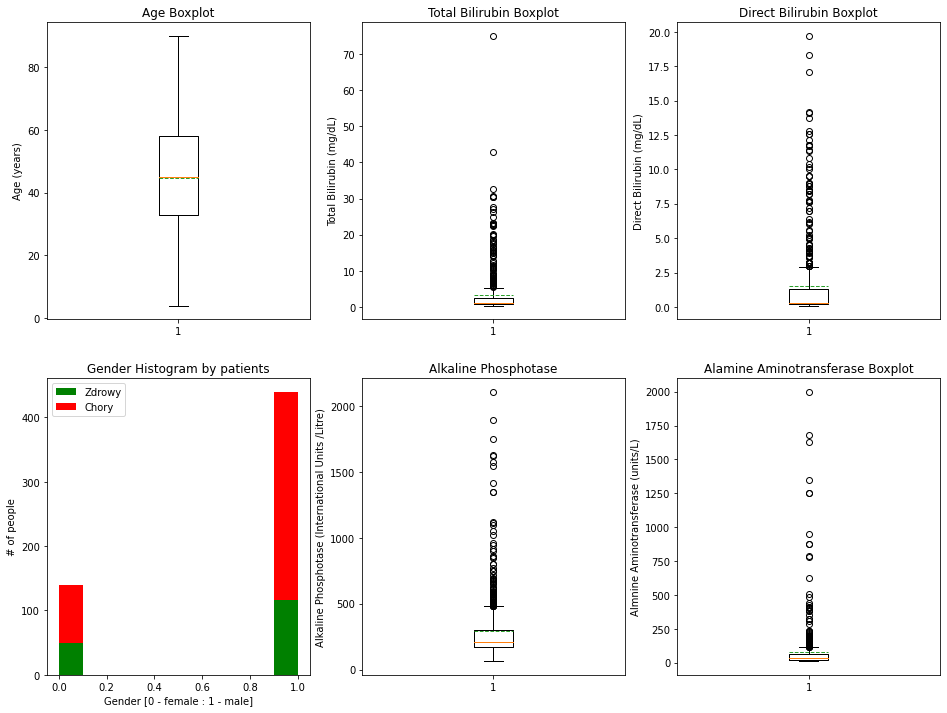

In [15]:
# czy któreś z danych odstają od reszty? 
# jak rozkłada się choroba pomiędzy płciami?


plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(x = data['Age'], showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age (years)')

plt.subplot(232)
plt.boxplot(data['Total_Bilirubin'], showmeans = True, meanline = True)
plt.title('Total Bilirubin Boxplot')
plt.ylabel('Total Bilirubin (mg/dL)')

plt.subplot(233)
plt.boxplot(data['Direct_Bilirubin'], showmeans = True, meanline = True)
plt.title('Direct Bilirubin Boxplot')
plt.ylabel('Direct Bilirubin (mg/dL)')

plt.subplot(234)
plt.hist(x = [data[y==1]['Sex'], data[y==0]['Sex']], 
         stacked=True, color = ['g','r'],label = ['Zdrowy','Chory'])
plt.title('Gender Histogram by patients')
plt.xlabel('Gender [0 - female : 1 - male]')
plt.ylabel('# of people')
plt.legend()

plt.subplot(235)
plt.boxplot(x = data['Alkaline_Phosphotase'], showmeans = True, meanline = True)
plt.title('Alkaline Phosphotase')
plt.ylabel('Alkaline Phosphotase (International Units /Litre)')

plt.subplot(236)
plt.boxplot(data['Alamine_Aminotransferase'], showmeans = True, meanline = True)
plt.title('Alamine Aminotransferase Boxplot')
plt.ylabel('Almnine Aminotransferase (units/L)')

In [16]:
# jak widzimy na wykresach, jest bardzo dużo odstających wartości; nie
# powinniśmy ich jednak pomijać, wysokie wartości pewnych czynników
# mogą wskazywać chorobę

# widać także, że choruje znacznie więcej mężczyzn

### Stwórzmy model

In [17]:
# najpierw podzielimy dane na zbiór testowy i ćwiczeniowy

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=0)

In [20]:
# potrzebne importy
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [21]:
# wyszukamy najlepsze parametry

from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)

In [22]:
# SVM rbf

pipeline1 = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(probability=True))])

param_grid_1 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_1 = GridSearchCV(pipeline1, param_grid_1, cv=kfold, return_train_score=True)

grid_1.fit(X_train, y_train)
grid_1.best_params_

{'classifier__C': 1, 'classifier__gamma': 0.1, 'preprocessing': None}

In [ ]:
# SVM poly

pipeline_2 = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel="poly", probability=True))]) 

param_grid_2 = {'preprocessing': [StandardScaler(), None],
              'classifier__C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              'classifier__coef0': [0.001, 0.01, 0.1, 1, 10, 100],
             'classifier__degree': [1, 2, 3, 4, 5, 6]}
grid_2 = GridSearchCV(pipeline_2, param_grid_2, cv=kfold, return_train_score=True)

grid_2.fit(X_train, y_train)
grid_2.best_params_

In [ ]:
# SVM linear

pipeline_3 = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel="linear", probability=True))])

param_grid_3 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}
grid_3 = GridSearchCV(pipeline_3, param_grid_3, cv=kfold, return_train_score=True)

grid_3.fit(X_train, y_train)
grid_3.best_params_

In [ ]:
# linear regression

pipeline_4 = Pipeline([('preprocessing', StandardScaler()), ('classifier', LogisticRegression(n_jobs=-1))])

param_grid_4 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_4 = GridSearchCV(pipeline_4, param_grid_4, cv=kfold, return_train_score=True) 
grid_4.fit(X_train, y_train)
grid_4.best_params_

In [ ]:
# decision tree classifier

pipeline_5 = Pipeline([('preprocessing', StandardScaler()), ('classifier', DecisionTreeClassifier())])

param_grid_5 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__max_depth': [1, 5, 10, 20],
            'classifier__max_leaf_nodes': [None, 5, 10, 20, 50, 100],
}

grid_5 = GridSearchCV(pipeline_5, param_grid_5, cv=kfold, return_train_score=True)

grid_5.fit(X_train, y_train)
grid_5.best_params_

In [ ]:
# random forest classifier

pipeline_6 = Pipeline([('preprocessing', StandardScaler()), ('classifier', RandomForestClassifier(n_jobs=-1))])

param_grid_6 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_estimators' : [1, 3, 5, 10, 50],
            'classifier__max_leaf_nodes' : [2, 4, 6, 16, 32, 64],
}

grid_6 = GridSearchCV(pipeline_6, param_grid_6, cv=kfold, return_train_score=True)

grid_6.fit(X_train, y_train)
grid_6.best_params_

In [ ]:
# ada boost classifier

pipeline_7 = Pipeline([('preprocessing', StandardScaler()), ('classifier', AdaBoostClassifier())])

param_grid_7 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_estimators' : [5, 10, 50, 100, 500, 600, 700],
            'classifier__learning_rate' : [0.001, 0.01, 0.1, 0.5, 0.7, 1],
}

grid_7 = GridSearchCV(pipeline_7, param_grid_7, cv=kfold, return_train_score=True)

grid_7.fit(X_train, y_train)
grid_7.best_params_

In [ ]:
# gradient boosting classifier

pipeline_8 = Pipeline([('preprocessing', StandardScaler()), ('classifier', GradientBoostingClassifier())])

param_grid_8 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_estimators' : [5, 10, 50, 100, 500],
            'classifier__learning_rate' : [0.001, 0.01, 0.1, 0.5, 0.7, 1],
}

grid_8 = GridSearchCV(pipeline_8, param_grid_8, cv=kfold, return_train_score=True)

grid_8.fit(X_train, y_train)
grid_8.best_params_